In [1]:
from google.colab import files
uploaded = files.upload()

Saving Life Expectancy.csv to Life Expectancy.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Life Expectancy.csv')

# Use to drop the NaN and infinity value
dfnew = pd.read_csv('Life Expectancy.csv')

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.shape

(2938, 22)

In [6]:
# Drop all the NaN and infinity value
dfnew = dfnew.dropna() 
dfnew.shape

(1649, 22)

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# **Heatmap**

In [8]:
corr = df.corr()
corr

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


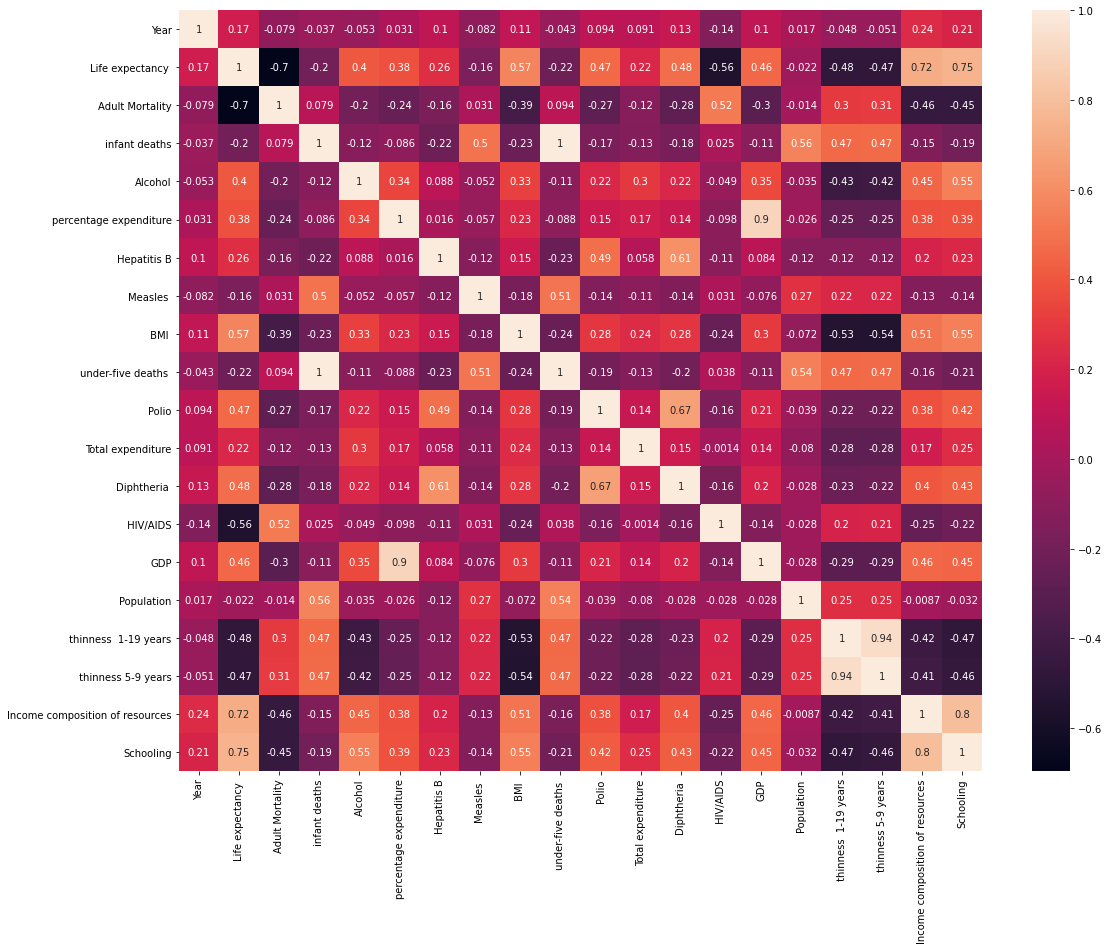

In [9]:
plt.figure(figsize=(18,14))
sns.heatmap(corr, annot = True)
# Output set 0-1 because our data is positively correlated(?)
# The line beside the heatmap shows the color representing what value
# The darker the color, the lower the correlationship

**Based on the heatmap, the life expectancy has the strongest relationship with schooling. Besides, The adult mortality has strong negative relationship with the life expectancy.**



**Before fit into the regression model, the NaN value and infinity value are removed from the data.**

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
# Drop all the NaN and infinity value
df = df.replace([np.inf, -np.inf], np.nan).dropna()

In [12]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

# **Task 1**

**Based on the heatmap above, it shows that Schooling and Life expectancy has the strongest positive relationship. Therefore, we consider Schooling as the independent vairable for the model 1.**

**x1 = Schooling**

**y = Life expectancy**

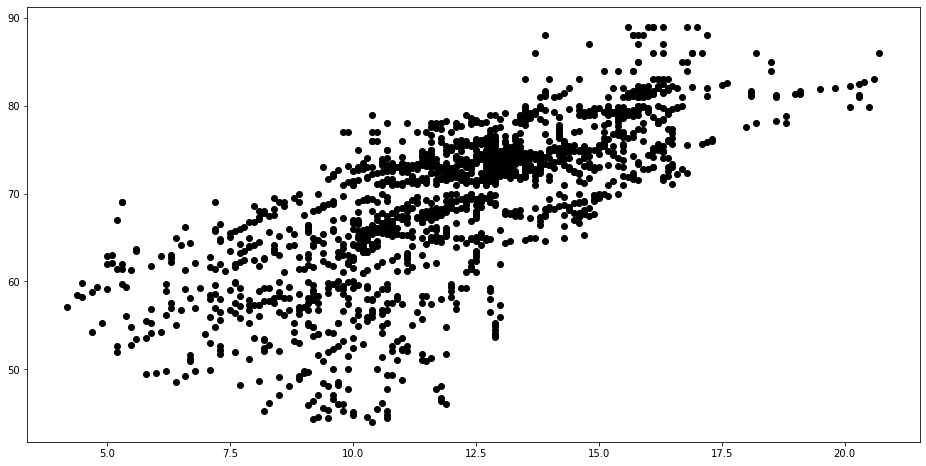

In [13]:
# Scatter plot for life expectancy and schooling
plt.figure(figsize=(16, 8))
plt.scatter(
    df['Schooling'],
    df['Life expectancy '],
    c='black'
)


The scatter plot above shows that the number of years of schooling and Life expectancy have a positive relationship. 

In [14]:
from sklearn.linear_model import LinearRegression

# Assign Life expectancy as our target result
y = df[['Life expectancy ']]

In [15]:
model1 = LinearRegression()

# Assign Schooling as the independent vairable for model 1
x1 = df[['Schooling']]

# Fit variables into Linear Regression Model
model1.fit(x1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
import statsmodels.api as sm
c = sm.add_constant(x1)
est = sm.OLS(y, c)
est2 = est.fit()
print(est2.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1853.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):          6.69e-272
Time:                        17:58:11   Log-Likelihood:                -5303.4
No. Observations:                1649   AIC:                         1.061e+04
Df Residuals:                    1647   BIC:                         1.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5503      0.662     62.804      0.0

In [17]:
print("Model 1 R-squared: ", model1.score(x1,y))
print("Model 1 slopes: ", model1.coef_)
print("Model 1 intercept: ", model1.intercept_)
print("The linear model is: Y = ", model1.intercept_, " + ",  model1.coef_[0], "X")

Model 1 R-squared:  0.5294454639356108
Model 1 slopes:  [[2.28978652]]
Model 1 intercept:  [41.55034175]
The linear model is: Y =  [41.55034175]  +  [2.28978652] X


The R-squred is 0.5294. It means that 52.94% of the variation in Y (Life expectancy) can been explained by the model Y =  [41.55034175]  +  [2.28978652] X containing X (Schooling) as independent variables. 

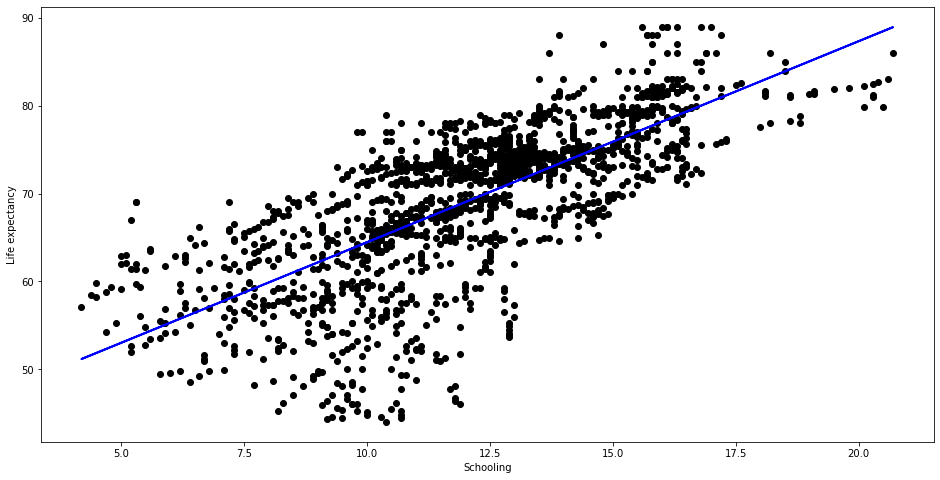

In [18]:
predictions = model1.predict(x1)
plt.figure(figsize=(16, 8))
plt.scatter(
    df['Schooling'],
    df['Life expectancy '],
    c='black'
)
plt.plot(
    df['Schooling'],
    predictions,
    c='blue',
    linewidth=2
)

plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.show()

Above shows the regression line fitted into the scatter plot of Life expectancy and Schooling. 

# **Task 2**

**Based on the heatmap, life expectancy also has a strong relationship of correlation values more than 0.5 with Adult Mortality, HIV/AIDS, BMI, Income composition of resources, Schooling. Hence, we also considered 5 of them to be the independent variables used in model 2 and model 3.** 

**Model 3 is our full multiple linear regression model which contains 5 independent variables (x1 = Schooling, x2 = Income composition of resources, x3 = Adult Mortality, x4 = HIV.AIDS, x5 = BMI).**

**Model 2 is the reduced model of model 3 and it contains 4 independent variables (x1 = Schooling, x2 = Income composition of resources, x3 = Adult Mortality, x4 = HIV.AIDS)**.


**Model 2**

In [19]:
# Model 2
model2 = LinearRegression()

X2 = df[['Schooling', 'Income composition of resources', 'Adult Mortality', ' HIV/AIDS' ]]


model2.fit(X2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print("Model 2 R-squared: ", model2.score(X2,y))
print("Model 2 slopes: ", model2.coef_)
print("Model 2 intercept: ", model2.intercept_)
print("The linear model 2 is: Y = ", model2.intercept_, " + ",  model2.coef_[0][0], "X1", " + ", model2.coef_[0][1], "X2", " + ", model2.coef_[0][2], "X3", " + ",  model2.coef_[0][3], "X4")

Model 2 R-squared:  0.8091754271312483
Model 2 slopes:  [[ 1.11448197 11.76169628 -0.01952667 -0.44212068]]
Model 2 intercept:  [52.52858503]
The linear model 2 is: Y =  [52.52858503]  +  1.1144819694703205 X1  +  11.761696280804617 X2  +  -0.019526672992128624 X3  +  -0.44212068471464877 X4


The R-squared is 0.8092. It means that 80.92% of the variation in Y (Life expectancy) had been explained by the model Y =  [52.52858503]  +  1.1144819694703205 X1  +  11.761696280804617 X2  +  -0.019526672992128624 X3  +  -0.44212068471464877 X4 containing X1, X2, X3 and X4 (Schooling,  Income composition of resources, adult mortality and HIV/AIDS) as independent variables. 

In [21]:
import statsmodels.api as sm
c2 = sm.add_constant(X2)
est2 = sm.OLS(y, c2)
est22 = est2.fit()
print(est22.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1743.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:58:12   Log-Likelihood:                -4559.2
No. Observations:                1649   AIC:                             9128.
Df Residuals:                    1644   BIC:                             9155.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

**Model 3**

In [22]:
# Model 3
model3 = LinearRegression()

X3 = df[['Schooling', 'Income composition of resources', 'Adult Mortality', ' HIV/AIDS', ' BMI ' ]]

model3.fit(X3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Model 3 R-squared: ", model3.score(X3,y))
print("Model 3 slopes: ", model3.coef_)
print("Model 3 intercept: ", model3.intercept_)
print("The linear model 3 is: Y = ", model3.intercept_, " + ",  model3.coef_[0][0], "X1", " + ", model3.coef_[0][1], "X2", " + ", model3.coef_[0][2], "X3", " + ",  model3.coef_[0][3], "X4", " + ",  model3.coef_[0][4], "X5")

Model 3 R-squared:  0.8143836332087386
Model 3 slopes:  [[ 1.00859972 11.08862606 -0.01889084 -0.4376488   0.03941039]]
Model 3 intercept:  [52.61845288]
The linear model 3 is: Y =  [52.61845288]  +  1.008599719287718 X1  +  11.088626060394057 X2  +  -0.018890843418528647 X3  +  -0.4376487967808206 X4  +  0.03941038987383472 X5


The R-squared is 0.8144. It means that 81.44% of the variation in Y (Life expectancy) can been explained by the model Y =  [52.61845288]  +  1.008599719287718 X1  +  11.088626060394057 X2  +  -0.018890843418528647 X3  +  -0.4376487967808206 X4  +  0.03941038987383472 X5 containing X1, X2, X3, X4 and X5 (Schooling,  Income composition of resources, adult mortality, HIV/AIDS and BMI) as independent variables.  

In [24]:
import statsmodels.api as sm
c3 = sm.add_constant(X3)
est3 = sm.OLS(y, c3)
est23 = est3.fit()
print(est23.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1442.
Date:                Wed, 15 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:58:12   Log-Likelihood:                -4536.4
No. Observations:                1649   AIC:                             9085.
Df Residuals:                    1643   BIC:                             9117.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

The difference between model 2 and model 3 is the addition of an independent variable "BMI". 
When "BMI" is added as an independent variable in Model 3, the adjusted R-squared value increases from 0.809 in model 2 to 0.814 in model 3. This shows that the addition of the variable "BMI" is relevant and hence will improve the model's performance.


# **Task 3**

In [25]:
from sklearn import metrics

y1_pred = model1.predict(x1)
y2_pred = model2.predict(X2)
y3_pred = model3.predict(X3)



In [26]:
print("RMSE for model 1: ", np.sqrt(metrics.mean_squared_error(y, y1_pred)))
print("RMSE for model 2: ", np.sqrt(metrics.mean_squared_error(y, y2_pred)))
print("RMSE for model 3: ", np.sqrt(metrics.mean_squared_error(y, y3_pred)))

RMSE for model 1:  6.032532376108394
RMSE for model 2:  3.841597222703469
RMSE for model 3:  3.7888098789164997


In [27]:
print("MAE for model 1: ", metrics.mean_absolute_error(y, y1_pred))
print("MAE for model 2: ", metrics.mean_absolute_error(y, y2_pred))
print("MAE for model 3: ", metrics.mean_absolute_error(y, y3_pred))

MAE for model 1:  4.552205897440244
MAE for model 2:  2.921456284012108
MAE for model 3:  2.8767329815465676


**Result**

By comparing the root mean squared error (RMSE) and mean absolute error (MAE) values of the three models, we can conclude that Model 3 is the best model compared to the other 2 models. It is because the RMSE and MAE values are the smallest compared to that of the other 2 models. Lower RMSE value indicates a better fit in the model as RMSE value indicates how close the observed data points are to the model’s predicted values.

Between the 3 models, model 3 shows the smallest difference between the RMSE and MAE values of 0.9121 which is explained by the least variance of the individual errors in the sample.


# **Task 4**

For task 4, we selected a set of value for the independent variables based on the their mean values.  
Data below shows the descriptive statistics of the Life expectancy data without any missing values as null values have been omitted.

In [28]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000



Based on the descriptive statistics above, the mean value for independent variables shown below:

* x1 = Schooling = 12.119891
* x2 = Income composition of resources = 0.631551
* x3 = Adult Mortality = 168.215282
* x4 = HIV.AIDS = 1.983869
* x5 = BMI = 38.128623	

We used R-programming to calculate the confidence interval for y with some reasonable x values.
*** May refer to attached R-programming file

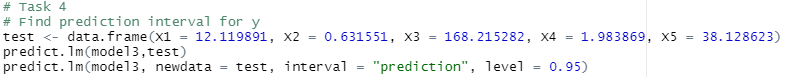

image.png

The 95% prediction interval for Y when x1 = 12.119891, x2 = 0.631551, x3 = 168.215282, x4 = 1.983869 and x5 = 38.128623	is (61.85508, 76.74952)